## Data Exploration
This notebook is for general data exploration of the PLAsTiCC data challenge. This notebook is based off a data exploration notebook written by Steven Stetzler and Brianna Thomas.

In [1]:
# Imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib import rcParams

In [2]:
# Settings
rcParams['figure.figsize'] = [6.5, 6.5]
rcParams['font.size'] = 10

In [3]:
# PLAsTiCC Data
# object_id, mjd,passband, flux, flux_err, detected
train = pd.read_csv("../plasticc/training_set.csv")

# object_id, ra, decl, gal_l, gal_b, ddf, hostgal_specz, hostgal_photoz, hostgal_photoz_err, distmod, mwebv, target
train_meta = pd.read_csv("../plasticc/training_set_metadata.csv")

In [4]:
# How many known classes are in the training set?
classes = train_meta['target'].unique()
classes.sort()

print("There are {} known classes in the PLAsTiCC training set. \nClasses are labeled as {}"\
      .format(len(classes), classes))

There are 14 known classes in the PLAsTiCC training set. 
Classes are labeled as [ 6 15 16 42 52 53 62 64 65 67 88 90 92 95]


In [10]:
# How many objects are in each class?
class_sizes = [len(train_meta['object_id'][train_meta['target'] == cl]) for cl in classes]

size_sort = np.argsort(class_sizes)
classes_str_sort = np.zeros(len(size_sort), dtype=int) 
class_sizes_sort = np.zeros(len(size_sort), dtype=int) 

# Populate list of class labels (strings) and sizes for all classes
for i in range(0, len(size_sort)): 
    classes_str = [str(i) for i in classes] 
    classes_str_sort[i] = classes_str[size_sort[i]] 
    class_sizes_sort[i] = class_sizes[size_sort[i]]

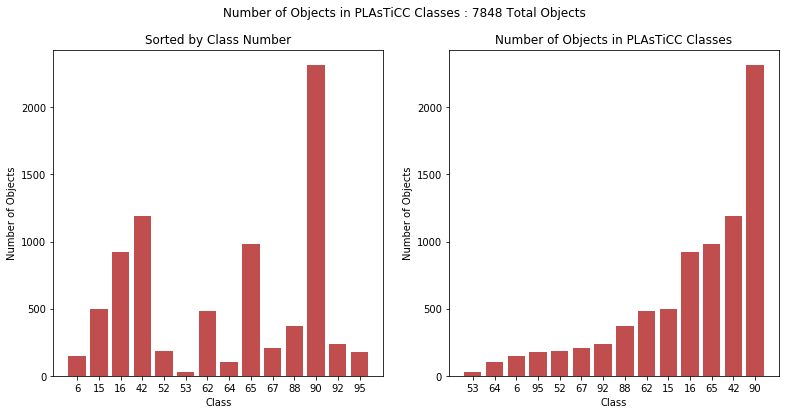

In [12]:
# Plot number of objects in PLAsTiCC classes
n_classes = np.arange(len(classes))

plt.figure(figsize=(13, 6))
plt.subplot(1,2,1)
plt.bar(n_classes, class_sizes, align='center', alpha=0.8, color = 'firebrick')
plt.xticks(n_classes, classes_str)
plt.xlabel('Class')
plt.ylabel('Number of Objects')
plt.title('Sorted by Class Number')

plt.subplot(1,2,2)
plt.bar(n_classes, class_sizes_sort, align='center', alpha=0.8, color = 'firebrick')
plt.xticks(n_classes, classes_str_sort)
plt.xlabel('Class')
plt.ylabel('Number of Objects')
# plt.title('Sorted by Class Size')
plt.title('Number of Objects in PLAsTiCC Classes')

plt.suptitle("Number of Objects in PLAsTiCC Classes : {} Total Objects".format(sum(class_sizes)))
plt.show()

In [13]:
# I would love to use groupby here, but I don't know why it's not working. I don't understand what isin does
# that groupby doesn't do. I also don't understand groupby fundamentally.

# Let's look at the data by individual class
# Create a dictionary of classes and pull all of the training data (every single observation) for each class
data_byclass = {cl : train[train['object_id'].isin(train_meta['object_id'][train_meta['target'] == cl])] \
                for cl in classes}

# ... and look at the objects by class
# Determine the unique objects within an individual class
objects_byclass = {cl : data_byclass[cl]['object_id'].unique() \
                  for cl in classes}

# ... and light curves by class
# Sort all the data by object
lightcurves_byclass = { cl : [ data_byclass[cl][data_byclass[cl]['object_id'] == o] for o in objects_byclass[cl] ] \
                       for cl in classes }

In [16]:
# Separate the light curves for each passband
def lightcurves_bypassband(data):
    return [ data[data['passband'] == i] for i in data['passband'].unique() ]

# Plot the light curve of a selected object in each passband
def plot_lightcurves(data, example_object, cl):
    data_bypassband = lightcurves_bypassband(data)
    
    passbands = { 0 : 'u', 1 : 'g', 2 : 'r', 3 : 'i', 4 : 'z', 5 : 'y' }
    colors = ['maroon', 'firebrick', 'crimson', 'tomato', 'lightsalmon', 'k']
    
    for i, data_passband in enumerate(data_bypassband):
        plt.errorbar(data_passband['mjd'], data_passband['flux'], yerr = data_passband['flux_err'], fmt = 'o',\
                     color = colors[i], markersize = 5, label="{}".format(passbands[i]))

    plt.xlabel('Time [MJD]')
    plt.ylabel('Flux')
    plt.title(f'Class {cl} : Object {objects_byclass[cl][example_object]}', size=14)

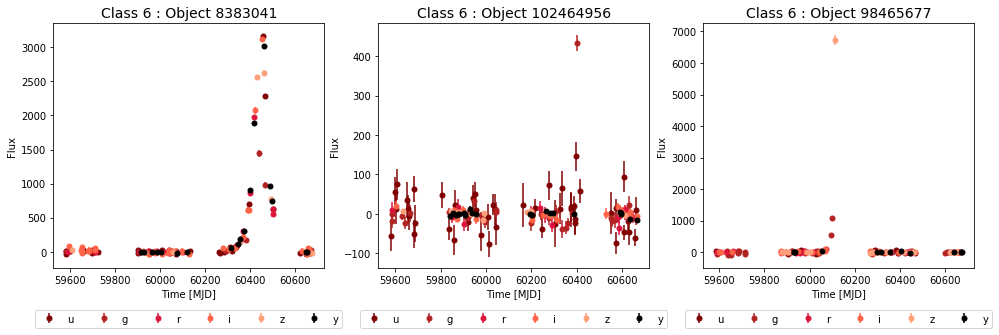

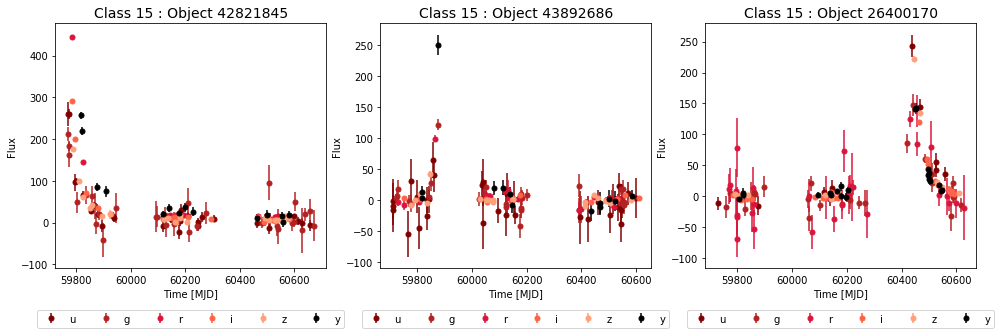

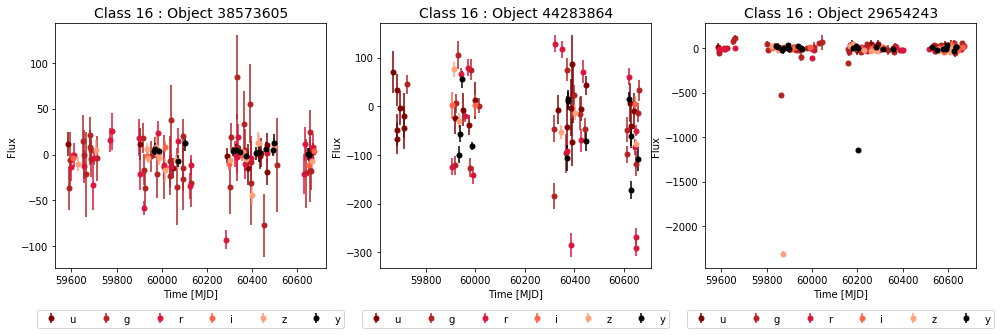

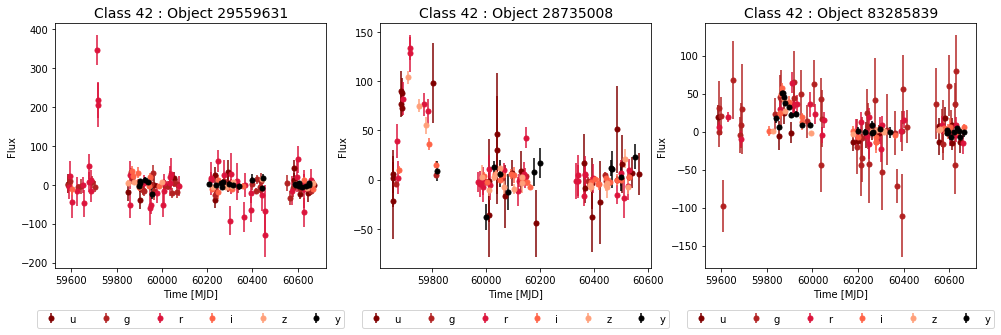

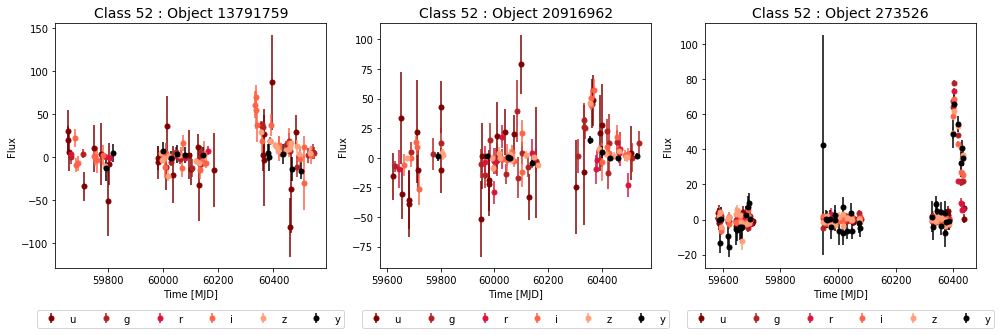

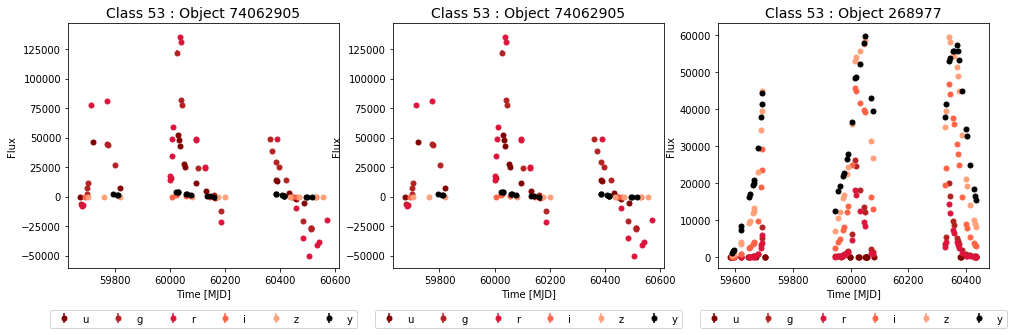

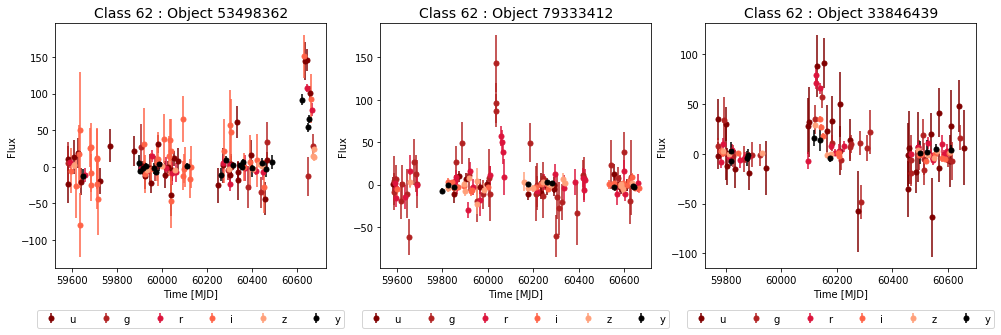

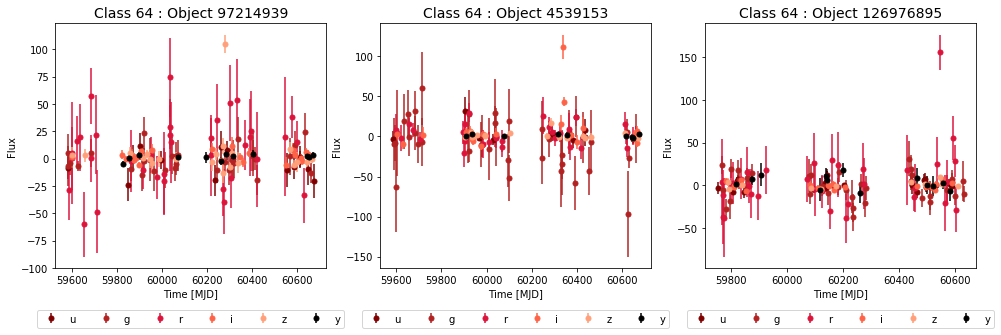

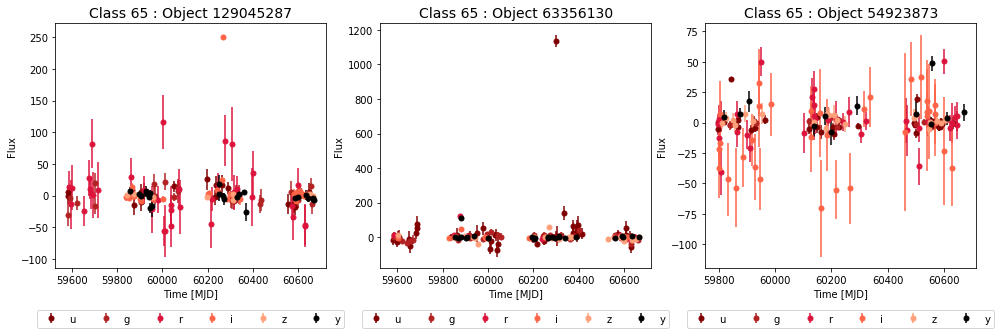

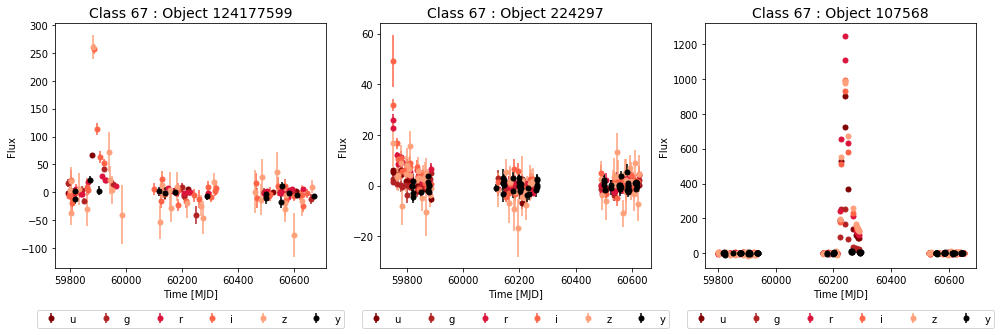

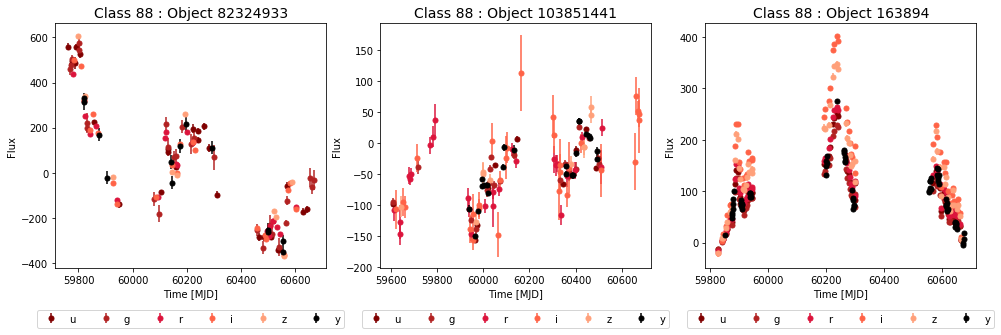

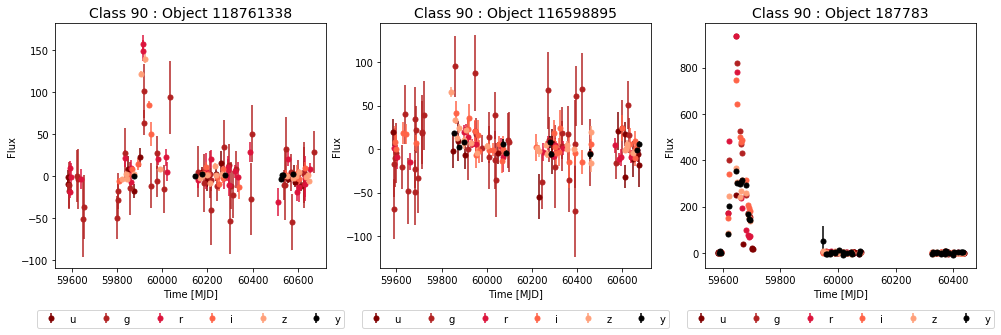

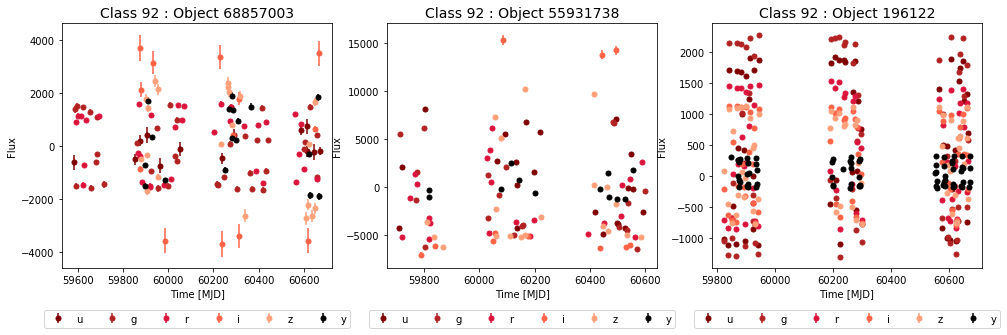

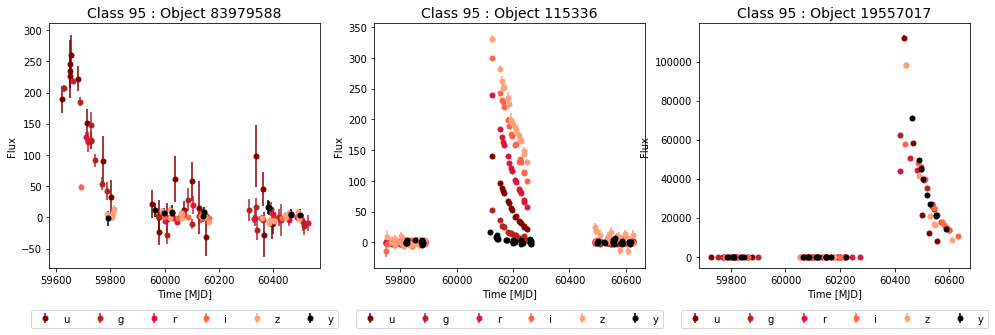

In [26]:
# Plot a light curve, indicating which class the light curve occupies

for j in range(len(classes)):
    cl = classes[j]
    n_objects = len(lightcurves_byclass[cl])

    plt.figure(figsize=(16.5, 4.5))

    for i in range(3):
        plt.subplot(1, 3, i+1)
    
        example_object = np.random.randint(n_objects)
        plot_lightcurves(lightcurves_byclass[cl][example_object], example_object, cl)
        plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=6)
    
    plt.savefig("Example Lightcurve Class "+str(cl)+".jpg")
    plt.show()

## Further questions
- How is the PLAsTiCC data formatted when analyzing the data as opposed to just plotting?
